In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,NaN,2.80,3.06,0.28,2.29,5.64,NaN,3.92,1065.0
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,NaN,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,NaN,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,NaN,16.8,NaN,3.85,3.49,NaN,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,NaN,NaN,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,NaN,1.41,NaN,NaN,1.56,750.0
175,13.27,4.28,NaN,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,NaN,1.46,9.30,NaN,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	46
float64		column 2	16
float64		column 3	30
float64		column 4	61
float64		column 5	76
float64		column 6	0
float64		column 7	16
float64		column 8	61
float64		column 9	0
float64		column 10	30
float64		column 11	45
float64		column 12	30
float64		column 13	45


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,132.000000,162.000000,148.000000,117.000000,102.000000,178.000000,162.000000,117.000000,178.000000,148.000000,133.000000,148.000000,133.000000
mean,12.975682,2.268889,2.370946,19.693162,100.588235,2.295112,2.015988,0.352308,1.590899,5.128919,0.951323,2.609459,746.210526
std,0.773252,1.043056,0.253115,3.145789,12.274382,0.625851,0.998681,0.109335,0.572359,2.352085,0.206006,0.699617,305.902714
min,11.030000,0.890000,1.700000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,290.000000
25%,12.370000,1.602500,2.237500,18.000000,94.000000,1.742500,1.205000,0.280000,1.250000,3.265000,0.820000,1.990000,510.000000
50%,13.050000,1.845000,2.360000,19.500000,100.500000,2.355000,2.120000,0.330000,1.555000,4.750000,0.960000,2.770000,680.000000
75%,13.565000,2.875000,2.542500,21.500000,106.750000,2.800000,2.790000,0.420000,1.950000,6.200000,1.070000,3.162500,937.000000
max,14.390000,5.650000,3.220000,30.000000,139.000000,3.880000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


<AxesSubplot:>

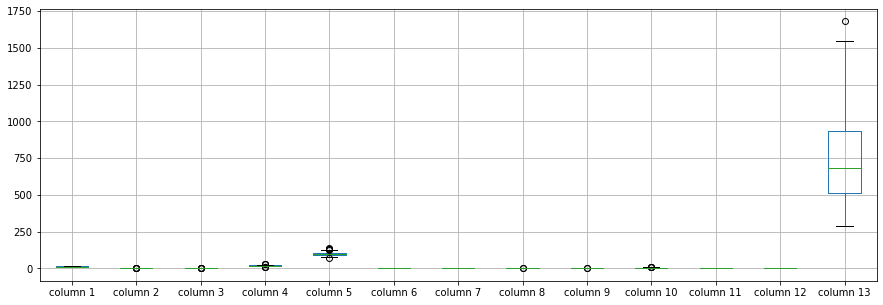

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.975682
column 2       2.268889
column 3       2.370946
column 4      19.693162
column 5     100.588235
column 6       2.295112
column 7       2.015988
column 8       0.352308
column 9       1.590899
column 10      5.128919
column 11      0.951323
column 12      2.609459
column 13    746.210526
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.195229,0.214223,-0.119174,0.258381,0.300999,0.168938,-0.109669,0.125652,0.533931,-0.045470,0.020987,0.652045
column 2,0.195229,1.000000,0.208227,0.289779,0.028758,-0.359339,-0.467495,0.322350,-0.288622,0.282383,-0.534870,-0.457318,-0.174570
column 3,0.214223,0.208227,1.000000,0.387649,0.336858,0.068162,0.019659,0.076294,-0.104551,0.229523,-0.086573,-0.118287,0.171813
column 4,-0.119174,0.289779,0.387649,1.000000,0.076732,-0.293964,-0.326793,0.386481,-0.221591,-0.013462,-0.230309,-0.296780,-0.407359
column 5,0.258381,0.028758,0.336858,0.076732,1.000000,0.201789,0.204322,-0.191074,0.062941,0.240017,-0.002913,0.018512,0.343207
column 6,0.300999,-0.359339,0.068162,-0.293964,0.201789,1.000000,0.857257,-0.474480,0.612413,-0.075258,0.402738,0.685518,0.481128
column 7,0.168938,-0.467495,0.019659,-0.326793,0.204322,0.857257,1.000000,-0.550871,0.640048,-0.160925,0.500604,0.767761,0.486811
column 8,-0.109669,0.322350,0.076294,0.386481,-0.191074,-0.474480,-0.550871,1.000000,-0.380557,0.145942,-0.286930,-0.456637,-0.187730
column 9,0.125652,-0.288622,-0.104551,-0.221591,0.062941,0.612413,0.640048,-0.380557,1.000000,-0.009758,0.292682,0.507620,0.353113
column 10,0.533931,0.282383,0.229523,-0.013462,0.240017,-0.075258,-0.160925,0.145942,-0.009758,1.000000,-0.488847,-0.420230,0.334964


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+100,13+100+100,13+100+100,13+100+100+100+100,13+100+100+100+100+100,13+100+100+100+100+100+100,13+100+100+100+100+100,13+100+100+100+100,13+100+100+100,13+100+100,13+100,13], vae_layer = False, seed = 1000)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 699.2063321200284
Epoch: 1 , loss: 698.2171353426846
Epoch: 2 , loss: 697.8391612659801
Epoch: 3 , loss: 693.3249400745739
Epoch: 4 , loss: 702.6408857865767
Epoch: 5 , loss: 692.3778242631392
Epoch: 6 , loss: 695.1412464488636
Epoch: 7 , loss: 695.4247630726207
Epoch: 8 , loss: 690.9977389248935
Epoch: 9 , loss: 698.6438709605824
Epoch: 10 , loss: 698.7104159268466
Epoch: 11 , loss: 699.328407981179
Epoch: 12 , loss: 695.5468805486506
Epoch: 13 , loss: 693.5278486772017
Epoch: 14 , loss: 693.929765181108
Epoch: 15 , loss: 690.8142644708806
Epoch: 16 , loss: 698.8440607244319
Epoch: 17 , loss: 690.6532370827415
Epoch: 18 , loss: 687.0044777610085
Epoch: 19 , loss: 683.381308815696
Epoch: 20 , loss: 694.5741466175426
Epoch: 21 , loss: 691.1336059570312
Epoch: 22 , loss: 686.525712446733
Epoch: 23 , loss: 686.8581709428267
Epoch: 24 , loss: 688.830849387429
Epoch: 25 , loss: 683.4023271040483
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       1.060519
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      3.056286
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,0.000000,-106.117205,0.0,0.0,0.000000,0.0,0.000000,-0.875399,0.0,0.000000
1,0.000000,0.0,0.000000,2.997341,0.000000,0.0,0.0,0.176497,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,-2.276439,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,-1.176196,0.000000,-72.575726,0.0,0.0,-1.252309,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,-13.684928,-85.336926,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.299489,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
174,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,-0.436918,0.0,-7.232154,-0.668682,0.0,0.000000
175,0.000000,0.0,-1.378097,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
176,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,-1.634575,0.0,0.000000,0.923439,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4156.702335901848, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3814160922589569

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5      42.493690
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      1.431415
column 11      1.120000
column 12      1.338021
column 13    252.674835
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,2.430000,15.600000,20.882795,2.80,3.06,0.280000,2.29,5.640000,0.164601,3.92,1065.000000
1,13.200000,1.78,2.140000,14.197341,100.000000,2.65,2.76,0.436497,1.28,4.380000,1.050000,3.40,1050.000000
2,13.160000,2.36,2.670000,16.323561,101.000000,2.80,3.24,0.300000,2.81,5.680000,1.030000,3.17,1185.000000
3,14.370000,1.95,1.323804,16.800000,40.424274,3.85,3.49,-1.012309,2.18,7.800000,0.860000,3.45,1480.000000
4,13.240000,2.59,2.870000,7.315072,32.663074,2.80,2.69,0.390000,1.82,4.320000,1.040000,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,17.009489,5.65,2.450000,20.500000,95.000000,1.68,0.61,0.520000,1.06,7.700000,0.640000,1.74,740.000000
174,13.400000,3.91,2.480000,23.000000,102.000000,1.80,0.75,-0.006918,1.41,0.067846,0.031318,1.56,750.000000
175,13.270000,4.28,0.881903,20.000000,120.000000,1.59,0.69,0.430000,1.35,10.200000,0.590000,1.56,835.000000
176,13.170000,2.59,2.370000,20.000000,120.000000,1.65,0.68,-1.104575,1.46,9.300000,1.523439,1.62,840.000000


In [20]:
imputations[-1].to_excel("Wine_NG_20(imp).xlsx", index=False, header=False)